In [57]:

# SMILES (Simplified Molecular Input Line Entry System) 

# a line notation (a typographical method using printable characters) 
# for entering and representing molecules and reactions

# https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

# I'll begin by importing the Chem module from the popular cheminformatics
# toolkit called RDKit. The Chem module is useful for generating molecule
# objects from valid input SMILES. It can also write SMILES for molecule 
# objects.

from rdkit import Chem


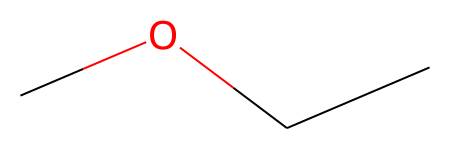

In [58]:
# methoxyethane
smi = "C-O-C-C"
m = Chem.MolFromSmiles(smi)
m

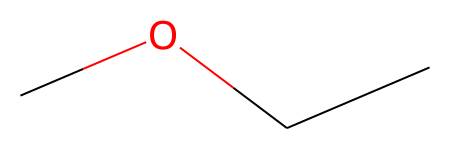

In [59]:
# single bonds are implied
smi = "COCC"
m = Chem.MolFromSmiles(smi)
m

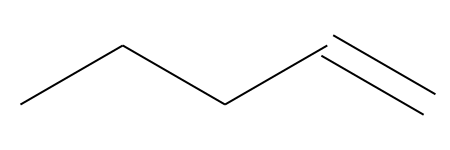

In [60]:
# 1-pentene, double bonds indicated with '='
smi = "CCCC=C"
m = Chem.MolFromSmiles(smi)
m

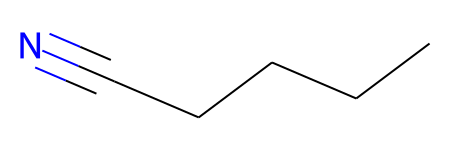

In [61]:
# triple bonds shown by '#'
ism = "CCCCC#N"
m = Chem.MolFromSmiles(ism)
m

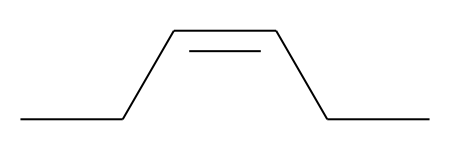

In [62]:
# geometric isomers can be specificied in isomeric SMILES (.ism), here is cis-3-hexene or Z-3-hexene
ism = "CC/C=C\CC"
m = Chem.MolFromSmiles(ism)
m

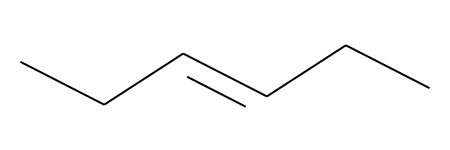

In [63]:
# here is trans 
ism = "CC/C=C/CC"
m = Chem.MolFromSmiles(ism)
m

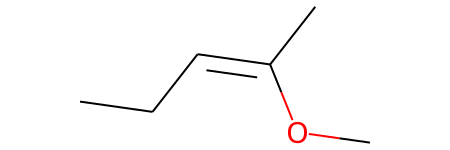

In [64]:
# another compound with trans double bond configuration specified in an isomeric SMILES (.ism) 
ism = "CC/C=C(OC)/C"
m = Chem.MolFromSmiles(ism)
m

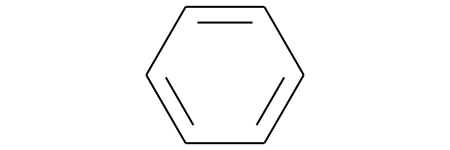

In [65]:
# aromatic rings can be represented by a "Kekulized" ring using explicit double bonds '='
smi = "C1=CC=CC=C1"
m = Chem.MolFromSmiles(smi)
m

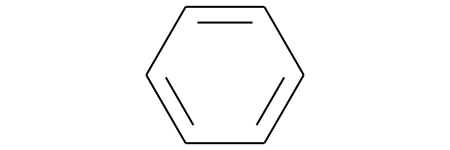

In [66]:
# aromatic bonds also implied in atoms using lower case
smi = "c1ccccc1"
m = Chem.MolFromSmiles(smi)
m

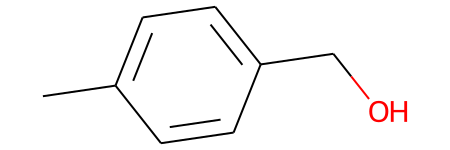

In [67]:
smi = "Cc1ccc(CO)cc1"
m = Chem.MolFromSmiles(smi)
m

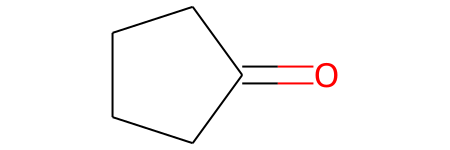

In [68]:
smi = "C1CC(=O)CC1"
m = Chem.MolFromSmiles(smi)
m


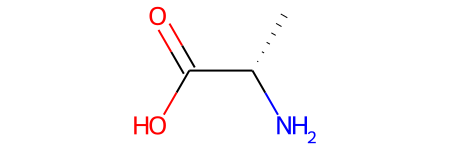

In [69]:
smi = "N[C@@H](C)C(=O)O"
m = Chem.MolFromSmiles(smi)
m


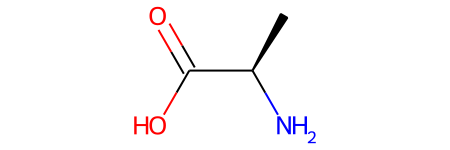

In [70]:
smi = "N[C@H](C)C(=O)O"
m = Chem.MolFromSmiles(smi)
m

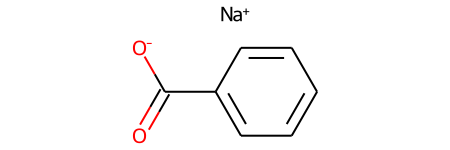

In [71]:
# sodium benzoate
smi = "C1=CC=C(C=C1)C(=O)[O-].[Na+]"
m = Chem.MolFromSmiles(smi)
m

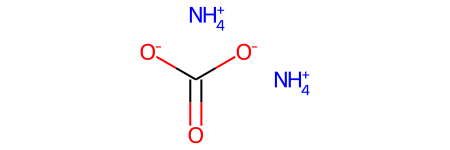

In [72]:
# ammonium carbonate -- atoms with formal charge, like ions are contained in square brackets. 
smi = "[NH4+].[NH4+].[O-]C(=O)[O-]"
m = Chem.MolFromSmiles(smi)
m

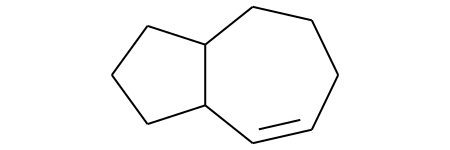

In [73]:
# multicyclic systems are labeled with number where ring closes
smi = "C1CCC2CCCC2C=C1"
m = Chem.MolFromSmiles(smi)
m

In [74]:
# let's use a function to label the atoms in the molecule
# based on RDKit's index number assignment to each atom

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol


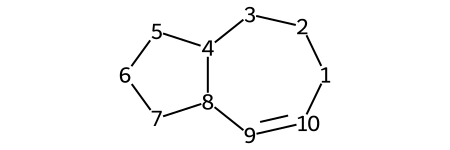

In [75]:
# the numbering here is derived directly from the input SMILES atom order
smi = "C1CCC2CCCC2C=C1"
m = Chem.MolFromSmiles(smi)
show_atom_number(m, 'atomLabel')

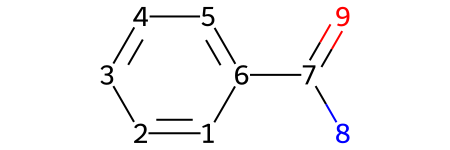

In [76]:
m = Chem.MolFromSmiles('c1ccccc1(C(N)=O)')
show_atom_number(m, 'atomLabel')

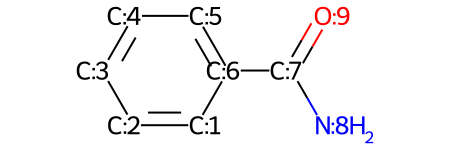

In [77]:
# a little fancier way to display atoms indices
mol = Chem.MolFromSmiles('c1ccccc1(C(N)=O)')
show_atom_number(mol, 'molAtomMapNumber')

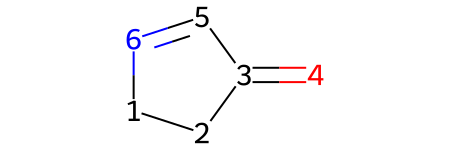

In [78]:
# a molecule can be described by different valid SMILES 
# simply by changing the order of the atom sequence
# one can start the string with any atom in the molecule
smi = "C1CC(=O)C=N1"
m = Chem.MolFromSmiles(smi)
show_atom_number(m, 'atomLabel')

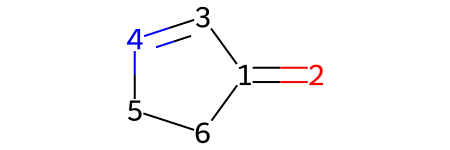

In [86]:
# this is a different string for the same molecule
smi = 'C1(=O)C=NCC1'
m = Chem.MolFromSmiles(smi)
show_atom_number(m, 'atomLabel')

In [87]:
# some programs have a preferred method for indexing atoms, 
# like using Cahn-Ingold rules for atom numbering.
# this produces a preferred order and unique SMILES
# this SMILES is called a canonical SMILES. It is useful 
# to canonicalize SMILES so molecule lists can be duplicated 
# by SMILES matches

can = Chem.MolToSmiles(m)
can

'O=C1C=NCC1'

In [81]:
# here is the SMILES we input originally
smi

'C1(=O)C=NCC1'

In [82]:
# here is the RDKit-canonicialized SMILES

# I canonicalized the SMILES in RDKit by first using it as input to generate 
# a molecule object and then converting the molecule object back into a SMILES.
# This SMILES will be written in the atom order preferred by RDKit, according
# to its rules for indexing.

# NOTE: different cheminformatics applications may have different 
# rules for canonicalization and will produce different canonicalized 
# SMILES for a given molecule.

smi2 = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
smi2


'O=C1C=NCC1'

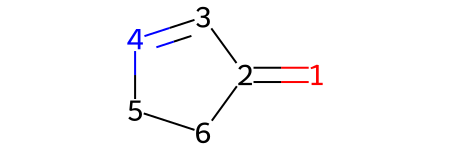

In [83]:
# it looks like RDKit prefers to start the indexing on the carbonyl oxygen
m = Chem.MolFromSmiles(smi2)
show_atom_number(m, 'atomLabel')

In [84]:
# thus the SMILES begins with 'O'
smi3 = Chem.MolToSmiles(m)
smi3

'O=C1C=NCC1'